In [2]:
import matplotlib.pyplot as plt
from csi import approach_a as exp

In [3]:
def load_audios(audio_files):
    arr = []
    for audio_file in audio_files:
        print('====Loading==== %s' % audio_file)
        audio = exp.Audio(audio_file)
        audio.extract_cic(hop_length=2**12)
        audio.extract_ssm()
        audio.extract_segments(size=16, max_levels=6)
        arr.append(audio)
    return arr
        
def plot_audio(aud):
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    aud.plot_ssm()
    aud.plot_profile()
    plt.subplot(1, 2, 2)
    aud.plot_ssm()
    aud.plot_segments()
    plt.show()

def plot_peaks(audios):
    plt.figure(figsize=(12, 10))
    idx=0
    for audio in audios:
        idx+=1
        plt.subplot(len(audios), 1, idx)
        audio.plot_ssm()
        audio.plot_peaks()
        plt.title(audio.filename)
    plt.show()

In [4]:
letitbe_files = [
    '/dataset/YTCdataset/letitbe/v3.mp3'
]
letitbe = load_audios(letitbe_files)

====Loading==== /dataset/YTCdataset/letitbe/v3.mp3


/usr/local/lib/python3.5/dist-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/notebooks/csi/approach_a.py:54: RuntimeWarning: invalid value encountered in true_divide
  row_d = (row_d-np.min(row_d))/(np.max(row_d)-np.min(row_d))
/notebooks/csi/approach_a.py:14: RuntimeWarning: invalid value encountered in true_divide
  return (arr2/np.amax(arr2))


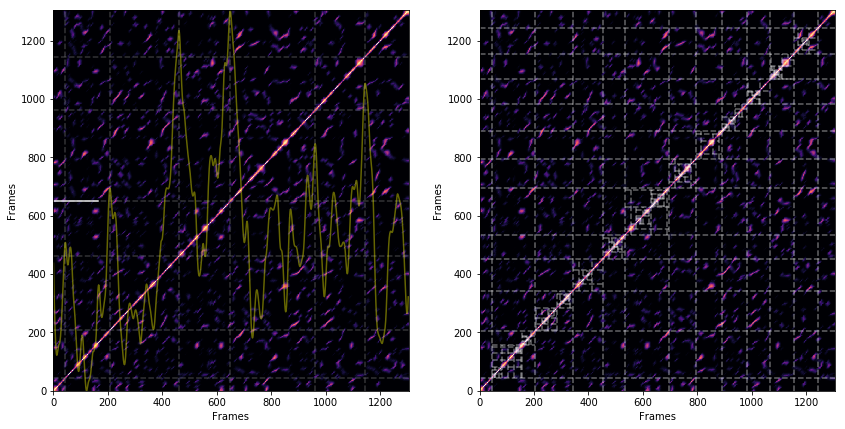

In [36]:
plot_audio(letitbe[0])

/notebooks/csi/approach_a.py:86: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(pks[idx], pks[idx]/pks[idx] + idx*bin_size + 20  , 'o')


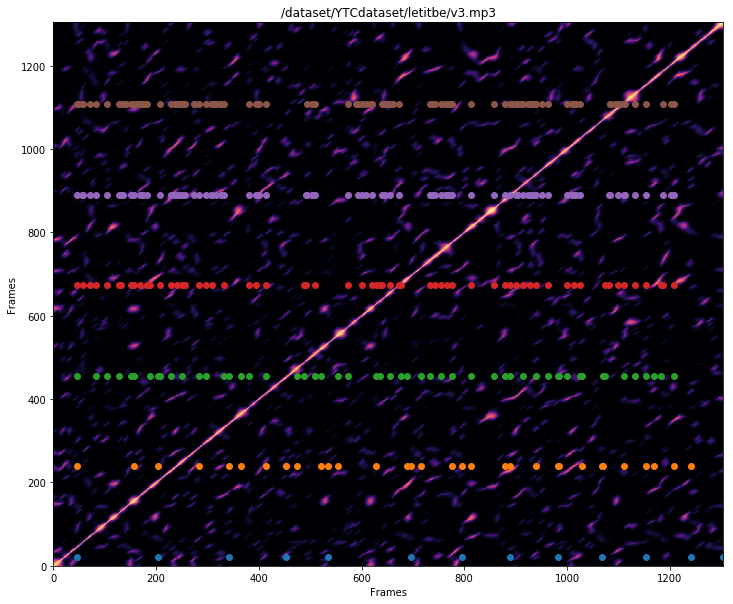

In [34]:
plot_peaks(letitbe)

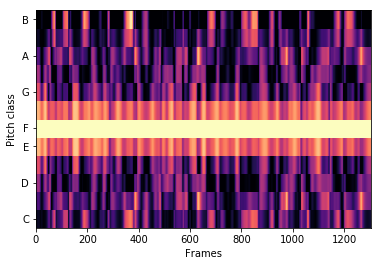

In [26]:
import numpy as np
letitbe[0].chroma = np.array(letitbe[0].chroma)
chroma = letitbe[0].plot_chroma()


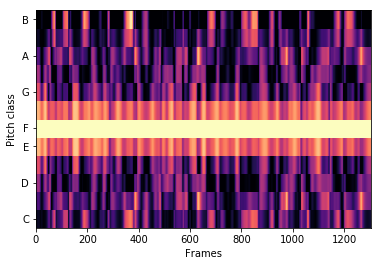

In [7]:
import numpy as np
letitbe[0].chroma = np.array(letitbe[0].chroma)
letitbe[0].plot_chroma()

NameError: name 'librosa' is not defined

In [ ]:

#beat_f = librosa.util.fix_frames(beats, x_max=chroma_orig.shape[1])
#sync = librosa.util.sync(chroma_orig, beat_f, aggregate=np.median)
chroma_spb = samples_per_beat(chroma_orig)
chroma = chroma_orig
#chroma = np.array(chroma_orig).T[309:381].T
chroma_length = len(chroma[0])